In [1]:
from IPython.display import display, HTML

display(HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
  $('div.input').hide();
 } else {
  $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>'''))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the data
df = pd.read_csv('../data/original/base_hcpc_final.csv', sep=';', parse_dates=['date_prelevement', 'LT_date'])


# Detailed Interpretation of Transbronchial Biopsy Data

## Dataset Overview

The dataset contains information on transbronchial biopsies from lung transplant patients. It includes 2,519 entries with 20 columns, providing a rich set of data for analysis. Here's a detailed breakdown of the dataset structure and content:

### Data Structure

1. **Size**: 2,519 entries (rows) with 20 columns.
2. **Memory Usage**: Approximately 393.7+ KB.

### Column Details

1. **N_sans_P** (float64):
   - Likely a unique identifier for each biopsy.
   - All 2,519 entries are non-null, ensuring complete data for this field.

2. **Histological Features** (object type):
   - final_capillarite_agg
   - final_hyperplasie_pn
   - final_pn_alv
   - final_fibrin_alv
   - final_mPNPorg
   - final_infiltrat_B_BNSP
   - final_infiltrat_A_A1_A2
   - These features are categorical, describing various histological findings in the biopsy samples.
   - All have 2,519 non-null entries, indicating complete data for these important diagnostic markers.

3. **clust** (int64):
   - Represents a cluster assignment, from a previous classification by the INSERM team.
   - All 2,519 entries are non-null, suggesting each biopsy has been categorized.

4. **protocol_cause** (object):
   - Indicates whether the biopsy was done as part of a protocol or for a specific cause.
   - This distinction is crucial for understanding the context of each biopsy.

5. **NEFG2** (object):
   - Likely a patient identifier.
   - Complete data (2,519 non-null entries) allows for patient-level analysis.

6. **delai_prelevement** (int64):
   - Possibly represents a delay or time interval related to the biopsy procedure.
   - Integer type suggests it might be measured in days or another discrete unit.

7. **time_point** (object):
   - Categorical variable indicating the timing of the biopsy in relation to the transplant.
   - Crucial for longitudinal analysis of patient outcomes.

8. **Date Fields** (datetime64[ns]):
   - date_prelevement: Date of the biopsy.
   - LT_date: Likely the date of lung transplantation.
   - These fields allow for precise temporal analysis of biopsy timing relative to transplantation.

9. **Additional Infiltration Markers** (object):
   - final_infiltrat_A
   - final_infiltrat_B
   - Provide more detailed information about infiltration patterns in the biopsy.

10. **C4d-related Fields**:
    - final_C4d (int64): Likely indicates presence/absence of C4d, a marker for antibody-mediated rejection.
    - final_C4d_distrib (float64): Possibly describes the distribution of C4d.
    - final_C4d_int (float64): Might represent the intensity of C4d staining.
    - Note: final_C4d has 2,519 non-null entries, while final_C4d_distrib and final_C4d_int have only 810 non-null entries each, indicating missing data for these more detailed C4d assessments.

## Key Observations

1. **Complete Core Data**: Most fields have complete data (2,519 non-null entries), which is excellent for comprehensive analysis.

2. **Missing C4d Data**: The detailed C4d fields (distribution and intensity) have significant missing data, with only 810 out of 2,519 entries populated. This may limit certain analyses related to C4d characteristics.

3. **Temporal Information**: The presence of both biopsy date and transplant date allows for detailed temporal analysis, including time since transplant for each biopsy.

4. **Categorical and Numerical Data**: The dataset combines categorical histological findings with numerical and datetime data, allowing for diverse analytical approaches.

5. **Patient-Level Analysis**: The NEFG2 field likely allows for grouping biopsies by patient, enabling longitudinal studies of individual patient trajectories.

6. **Protocol vs. Cause Biopsies**: The distinction between protocol and cause-driven biopsies provides context for interpreting findings and may correlate with patient outcomes.

## Potential Analyses

1. Longitudinal tracking of histological changes post-transplant.
2. Correlation between histological features and time since transplant.
3. Comparison of findings between protocol and cause-driven biopsies.
4. Cluster analysis to identify patterns in histological features.
5. Investigation of C4d presence and its relationship with other histological findings.
6. Patient-specific trajectories of biopsy results over time.

## Limitations and Considerations

1. The meaning of some coded variables (e.g., clust, N_sans_P) may require additional context for full interpretation.
2. The significant missing data in C4d distribution and intensity fields may limit comprehensive analysis of C4d-related outcomes.
3. Without additional outcome data (e.g., graft survival, patient survival), the prognostic value of these findings may be limited.

This rich dataset provides a solid foundation for in-depth analysis of transbronchial biopsy findings in lung transplant patients, with potential for significant insights into post-transplant lung health and rejection patterns.

In [3]:
# Basic information about the dataset
print(df.info())
print("\nSample of the data:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   N_sans_P                 2519 non-null   float64       
 1   final_capillarite_agg    2519 non-null   object        
 2   final_hyperplasie_pn     2519 non-null   object        
 3   final_pn_alv             2519 non-null   object        
 4   final_fibrin_alv         2519 non-null   object        
 5   final_mPNPorg            2519 non-null   object        
 6   final_infiltrat_B_BNSP   2519 non-null   object        
 7   final_infiltrat_A_A1_A2  2519 non-null   object        
 8   clust                    2519 non-null   int64         
 9   protocol_cause           2519 non-null   object        
 10  NEFG2                    2519 non-null   object        
 11  delai_prelevement        2519 non-null   int64         
 12  time_point               2519 non-

# Interpretation of Transbronchial Biopsy Data Summary Statistics

## Overview
This summary provides detailed statistics for a dataset of 2,519 transbronchial biopsies, likely from lung transplant patients. The data includes various histological features, timing information, and patient identifiers.

## Key Observations

### 1. Sample Size and Patient Distribution
- Total biopsies: 2,519
- Unique patients (NEFG2): 498
- Most biopsied patient: 13 biopsies (NEFG2: 274444)

This indicates multiple biopsies per patient, allowing for longitudinal analysis.

### 2. Biopsy Types
- Protocol biopsies: 1,961 (77.8%)
- For cause biopsies: 558 (22.2%)

The majority are protocol biopsies, suggesting routine follow-ups are more common than symptom-driven biopsies.

### 3. Histological Features
All histological features are binary (0 or 1), with varying distributions:

- final_capillarite_agg_0: 1,422 (56.5%)
- final_hyperplasie_pn_0: 2,335 (92.7%)
- final_pn_alv_0: 2,415 (95.9%)
- final_fibrin_alv_0: 2,411 (95.7%)
- final_mPNPorg_0: 2,185 (86.7%)
- final_infiltrat_B_BNSP_0: 2,301 (91.3%)
- final_infiltrat_A_A1_A2_0: 2,158 (85.7%)

Most features show a high prevalence of '0' values, indicating that positive findings are relatively rare.

### 4. Clustering (clust)
- Range: 1 to 6
- Mean: 2.41
- Median: 2
- Standard deviation: 1.66

This suggests an uneven distribution across clusters, with lower-numbered clusters being more common.

### 5. Time-Related Information
- delai_prelevement (likely days since transplant):
  - Mean: 289.86 days
  - Median: 149 days
  - Range: 20 to 3,311 days
- Biopsy dates range: 2011-10-26 to 2019-12-05
- Transplant dates range: 2010-02-16 to 2019-11-01

This wide range allows for both short-term and long-term follow-up analyses.

### 6. C4d-Related Data
- final_C4d (n=2,519):
  - Mean: 0.326 (32.6% positive)
- final_C4d_distrib and final_C4d_int (n=810):
  - Significant missing data (67.8% missing)
  - For available data:
    - C4d distribution mean: 0.641
    - C4d intensity mean: 0.507

The high percentage of missing C4d distribution and intensity data limits comprehensive analysis of these features.

## Implications for Analysis

1. **Longitudinal Studies**: The dataset supports patient-specific trajectory analysis over time.
2. **Rare Events**: Most histological features have low prevalence, which may require special statistical approaches for rare event analysis.
3. **Clustering Analysis**: The uneven distribution of cluster assignments warrants investigation into cluster characteristics and potential clinical significance.
4. **Time-Based Analysis**: The wide range of follow-up times allows for both short-term and long-term outcome studies.
5. **C4d Analysis**: While presence/absence of C4d is well-documented, the limited data on distribution and intensity may restrict detailed C4d-related analyses.
6. **Protocol vs. For Cause Comparison**: The dataset allows for comparison of findings between routine and symptom-driven biopsies.

## Limitations

1. The binary nature of histological features may not capture subtle gradations in pathology.
2. Missing data in C4d distribution and intensity limits comprehensive analysis of antibody-mediated rejection patterns.
3. Without additional outcome data, the prognostic value of these findings may be limited.

This rich dataset provides a solid foundation for in-depth analysis of transbronchial biopsy findings in lung transplant patients, with potential for significant insights into post-transplant lung health and rejection patterns.

In [4]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
           N_sans_P    final_capillarite_agg    final_hyperplasie_pn  \
count   2519.000000                     2519                    2519   
unique          NaN                        2                       2   
top             NaN  final_capillarite_agg_0  final_hyperplasie_pn_0   
freq            NaN                     1422                    2335   
mean      15.910539                      NaN                     NaN   
min       11.107740                      NaN                     NaN   
25%       14.103230                      NaN                     NaN   
50%       15.817100                      NaN                     NaN   
75%       18.140635                      NaN                     NaN   
max       19.999200                      NaN                     NaN   
std        2.356145                      NaN                     NaN   

          final_pn_alv    final_fibrin_alv    final_mPNPorg  \
count             2519                2519         

In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
N_sans_P                      0
final_capillarite_agg         0
final_hyperplasie_pn          0
final_pn_alv                  0
final_fibrin_alv              0
final_mPNPorg                 0
final_infiltrat_B_BNSP        0
final_infiltrat_A_A1_A2       0
clust                         0
protocol_cause                0
NEFG2                         0
delai_prelevement             0
time_point                    0
date_prelevement              0
LT_date                       0
final_infiltrat_A             0
final_infiltrat_B             0
final_C4d                     0
final_C4d_distrib          1709
final_C4d_int              1709
dtype: int64


# Analysis of Transbronchial Biopsy Data

## Distribution of Biopsy Types


The bar chart shows the distribution of biopsy types:

- Protocol biopsies are far more common, with nearly 2000 cases.
- For-cause biopsies are less frequent, with about 550 cases.

This distribution suggests that routine monitoring (protocol biopsies) forms the majority of the biopsy procedures, while biopsies performed due to clinical suspicion of rejection or other issues (for-cause) are less common but still a significant portion of the total.


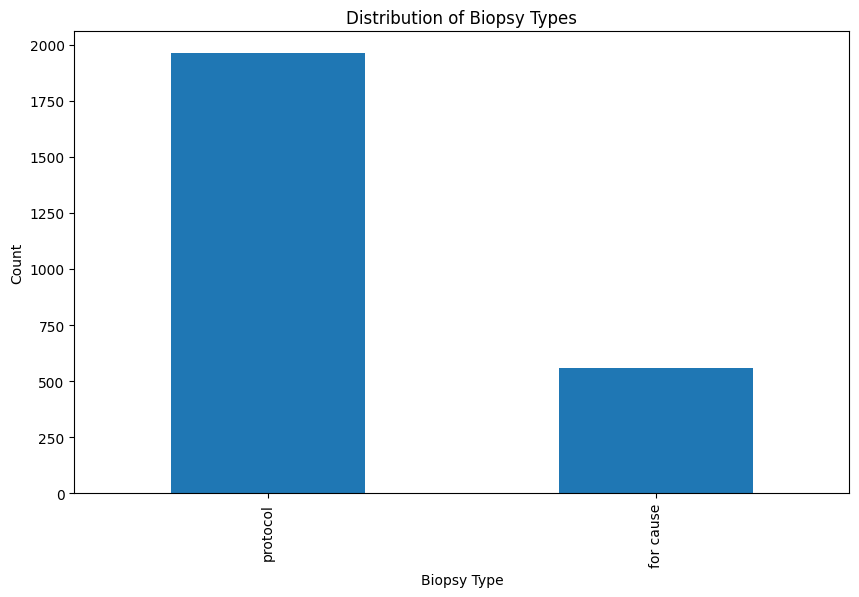

In [6]:
# Distribution of biopsy types
plt.figure(figsize=(10, 6))
df['protocol_cause'].value_counts().plot(kind='bar')
plt.title('Distribution of Biopsy Types')
plt.xlabel('Biopsy Type')
plt.ylabel('Count')
plt.show()


## Distribution of Clusters

The graph shows the distribution of biopsies across six clusters:

- Cluster 1 is the most common, with over 1000 biopsies.
- Cluster 2 is the second most common, with about 600 biopsies.
- Clusters 3, 4, 5, and 6 have fewer biopsies, ranging from about 200 to 300 each.

This uneven distribution suggests that certain pathological patterns (represented by clusters 1 and 2) are more common in the patient population. The less frequent clusters may represent rarer conditions or specific stages of graft rejection or health.


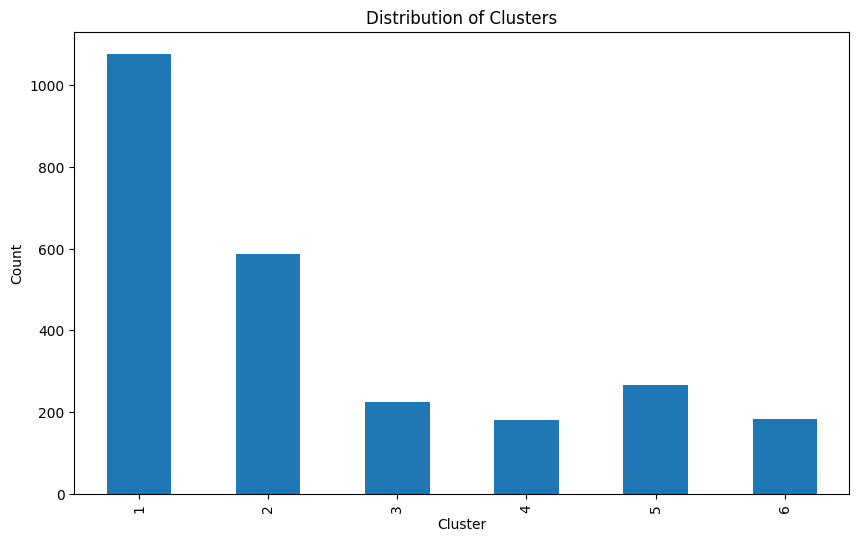

In [7]:
# Distribution of clusters
plt.figure(figsize=(10, 6))
df['clust'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

## Distribution of Days Since Transplant


The histogram shows the distribution of biopsies relative to the time since transplantation:

- There's a high peak in the first few hundred days post-transplant, indicating that most biopsies are performed in the first year.
- The frequency of biopsies decreases rapidly after the first year, as shown by the long tail of the distribution.
- There are some biopsies performed even after 2500 days (about 7 years) post-transplant, but these are relatively rare.

This distribution aligns with typical post-transplant monitoring protocols, where frequent biopsies are performed in the first year to monitor for acute rejection, with less frequent monitoring in subsequent years.


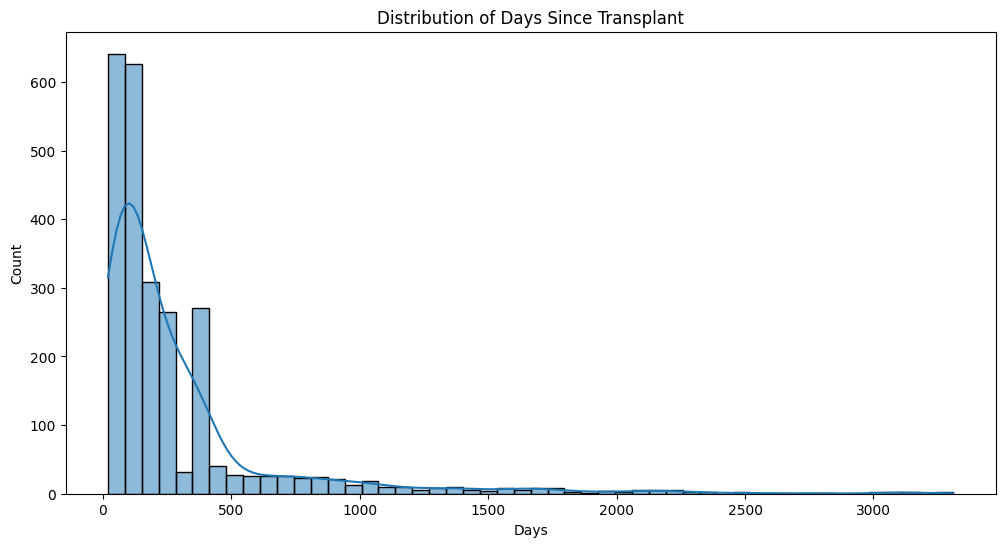

In [8]:
# Time since transplant
df['days_since_transplant'] = (df['date_prelevement'] - df['LT_date']).dt.days
plt.figure(figsize=(12, 6))
sns.histplot(df['days_since_transplant'], bins=50, kde=True)
plt.title('Distribution of Days Since Transplant')
plt.xlabel('Days')
plt.show()

## Correlation Heatmap of Numerical Features

Key observations from the correlation heatmap:

- High correlation (0.9) between 'final_C4d_distrib' and 'final_C4d_int', suggesting these C4d-related measurements are closely related.
- Weak to moderate positive correlations between 'N_sans_P' and C4d-related features (0.28-0.38).
- Weak negative correlation (-0.15) between 'N_sans_P' and 'clust'.
- Most other correlations are weak, indicating that many features are relatively independent of each other.


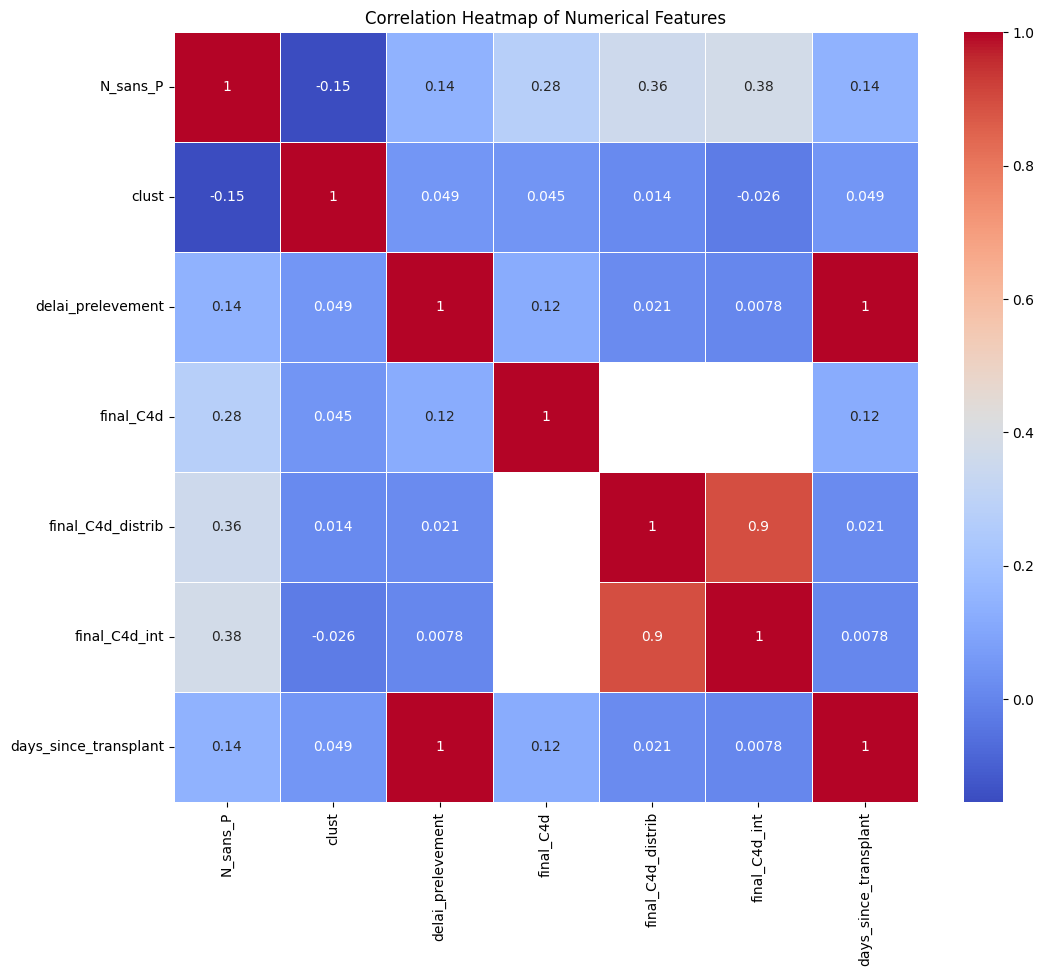

In [9]:
# Correlation heatmap of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## Relationship between Biopsy Type and Cluster

This stacked bar chart shows the distribution of clusters across biopsy types:

- Protocol biopsies are more numerous than for-cause biopsies.
- Cluster 1 is the most common in both biopsy types, especially in protocol biopsies.
- Clusters 2 and 5 are also well-represented in both types.
- Clusters 3, 4, and 6 are less common overall.
- The proportion of clusters seems to differ between protocol and for-cause biopsies, suggesting that certain pathological patterns may be more likely to trigger for-cause biopsies.



Cross-tabulation of Biopsy Type and Cluster:
clust             1    2    3   4    5    6
protocol_cause                             
for cause       179  113   59  92   48   67
protocol        898  475  166  88  218  116


<Figure size 1200x600 with 0 Axes>

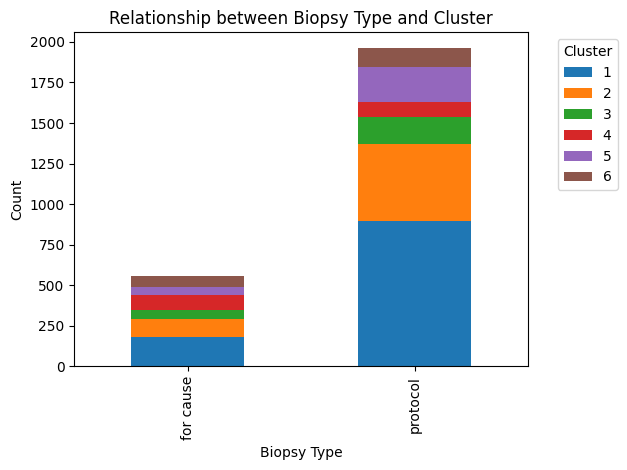

In [10]:
# Analyze the relationship between biopsy type and cluster
cross_tab = pd.crosstab(df['protocol_cause'], df['clust'])
print("\nCross-tabulation of Biopsy Type and Cluster:")
print(cross_tab)
# Visualize the relationship
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Relationship between Biopsy Type and Cluster')
plt.xlabel('Biopsy Type')
plt.ylabel('Count')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Histological Features over Time by Cluster

This set of scatter plots shows the presence (1) or absence (0) of various histological features over time, colored by cluster:

- Most features show a mix of presence and absence across all time points.
- Some features (e.g., final_capillarite_agg, final_hyperplasie_pn) show clear differences between clusters.
- Certain clusters (e.g., 5 and 6) tend to have more positive findings across multiple features.
- There's no clear time-dependent pattern for most features, suggesting that these pathological findings can occur at any time post-transplant.


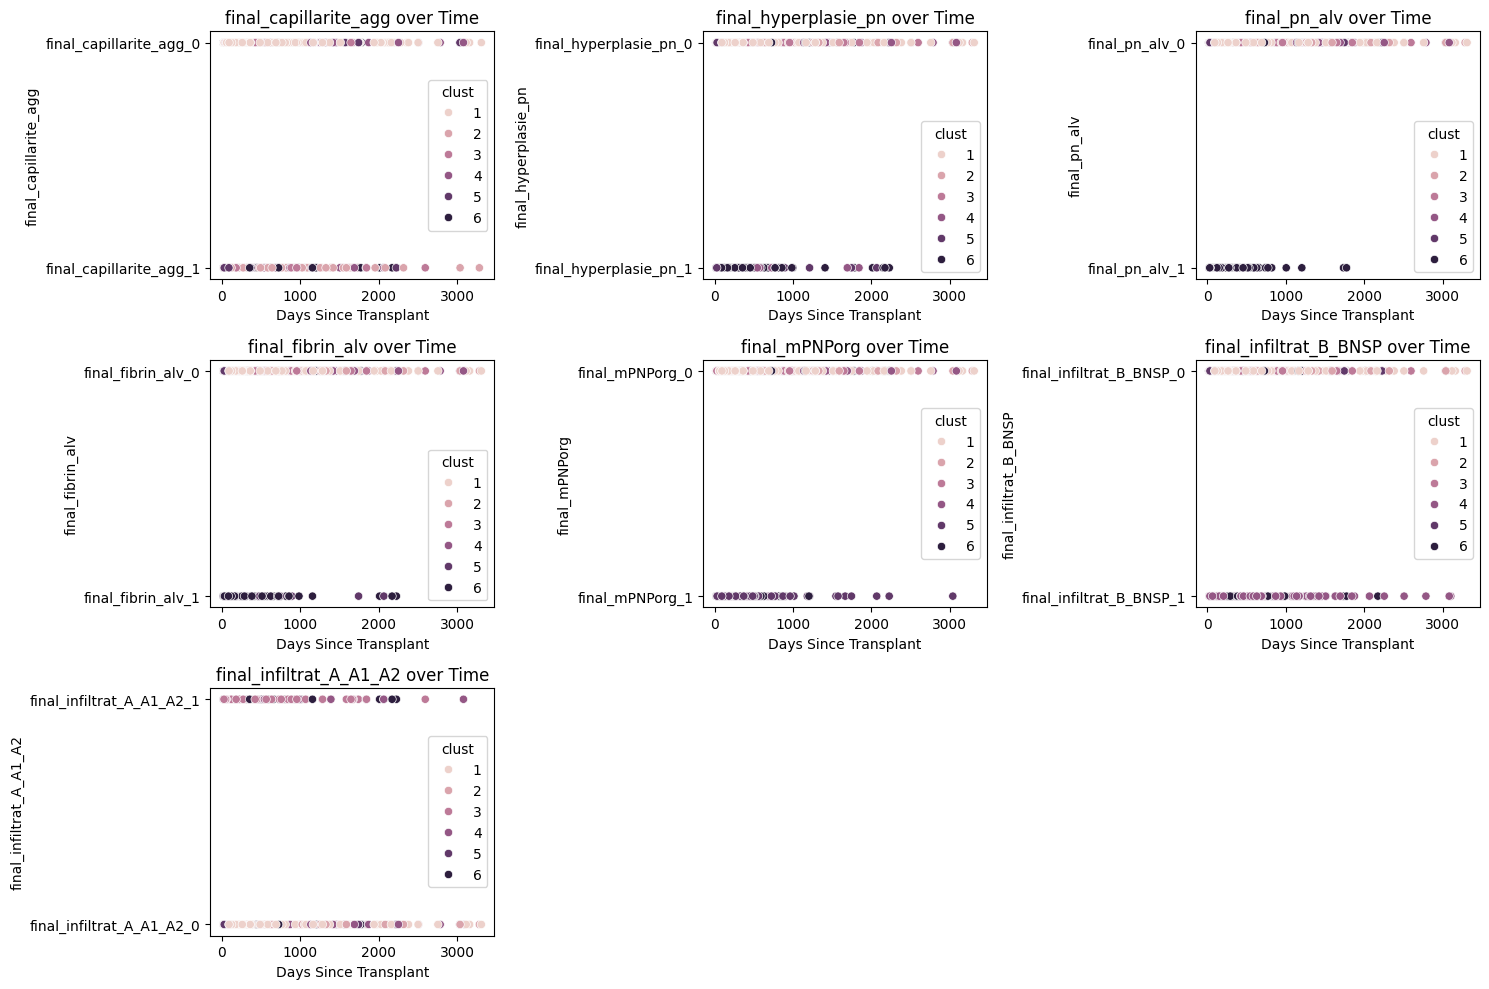

In [11]:
# Analyze the progression of features over time
time_features = ['final_capillarite_agg', 'final_hyperplasie_pn', 'final_pn_alv', 
                 'final_fibrin_alv', 'final_mPNPorg', 'final_infiltrat_B_BNSP', 
                 'final_infiltrat_A_A1_A2']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(time_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x='days_since_transplant', y=feature, hue='clust')
    plt.title(f'{feature} over Time')
    plt.xlabel('Days Since Transplant')
plt.tight_layout()
plt.show()

## Distribution of final_C4d

This bar chart shows the distribution of the final_C4d variable:

- The variable is binary, with values 0 and 1.
- There are approximately 1700 cases with a value of 0.
- There are about 800 cases with a value of 1.
- The ratio of 0 to 1 is roughly 2:1, indicating that C4d is absent in about two-thirds of the biopsies and present in one-third.

This distribution suggests that C4d positivity, which can be an indicator of antibody-mediated rejection, is present in a significant minority of biopsies.

## Distribution of final_C4d_int


This bar chart shows the distribution of the final_C4d_int variable:

- The variable is binary, with values 0 and 1.
- There are slightly more cases with a value of 1 (about 410) compared to 0 (about 400).
- The distribution is nearly balanced, with a slight preference for value 1.

This suggests that when C4d is present (as indicated by final_C4d), its intensity is roughly equally distributed between low (0) and high (1) levels.

## Distribution of final_C4d_distrib


This bar chart illustrates the distribution of the final_C4d_distrib variable:

- The variable has three possible values: 0, 1, and 2.
- Value 0 is the most common, with about 400 cases.
- Value 1 is the second most common, with about 300 cases.
- Value 2 is the least common, with about 100 cases.

This distribution suggests that when C4d is present, it's most often not distributed (0), followed by some distribution (1), and least commonly widely distributed (2).


## Summary

1. C4d is absent in about two-thirds of biopsies and present in one-third, indicating that antibody-mediated rejection may be a concern in a significant minority of cases.
2. When C4d is present, its intensity is roughly equally split between low and high levels.
3. The distribution of C4d, when present, tends towards limited or no distribution rather than wide distribution.



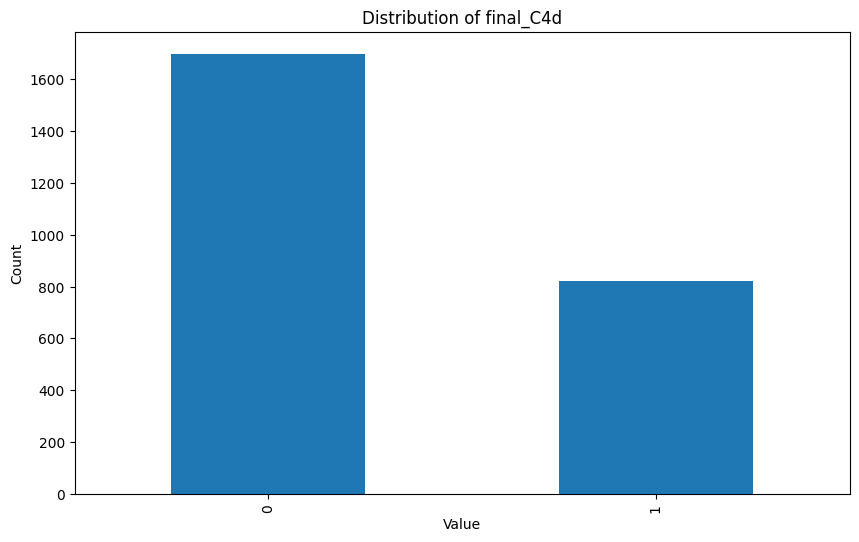

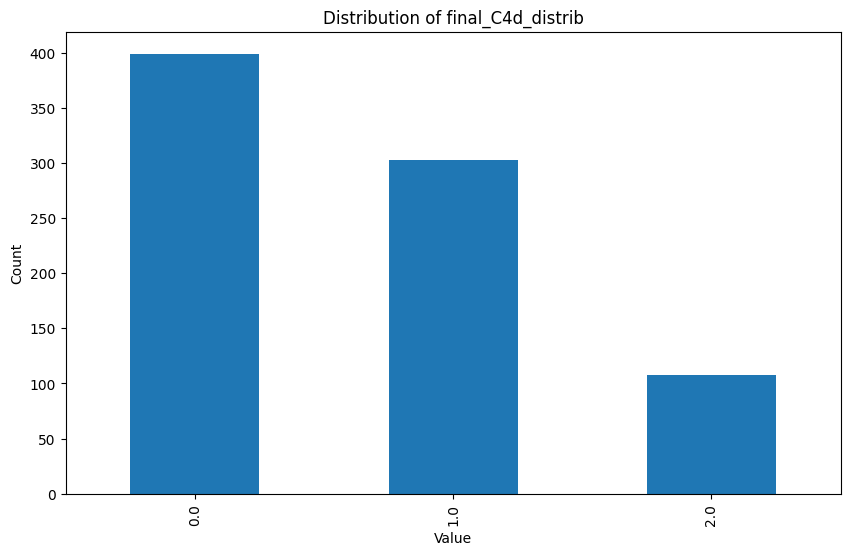

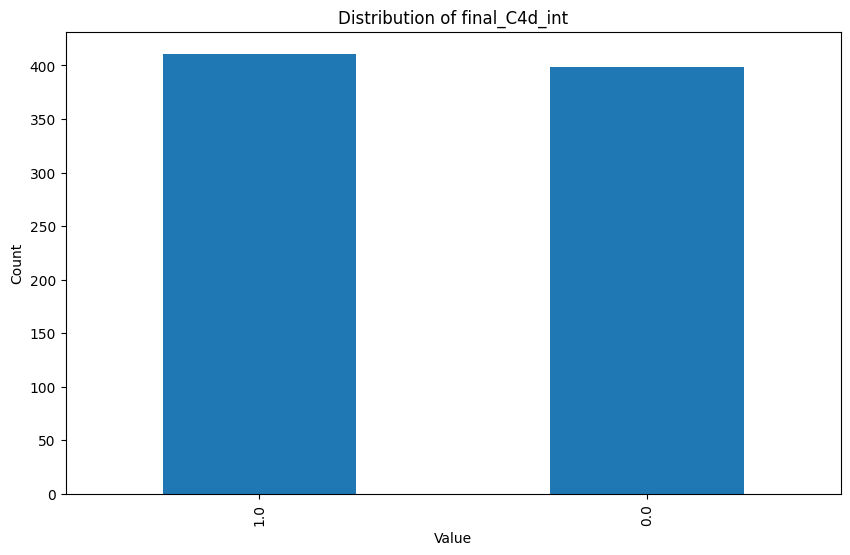


Key Findings:
1. Total number of biopsies: 2519
2. Number of unique patients (NEFG2): 498
3. Date range of biopsies: from 2011-10-26 00:00:00 to 2019-12-05 00:00:00
4. Most common cluster: 1
5. Proportion of protocol vs. for cause biopsies: protocol_cause
protocol     0.778484
for cause    0.221516
Name: proportion, dtype: float64
6. Average time between transplant and biopsy: 289.86 days
7. Correlation between days since transplant and cluster: 0.05


In [12]:
# Analyze C4d features
c4d_features = ['final_C4d', 'final_C4d_distrib', 'final_C4d_int']
for feature in c4d_features:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

print("\nKey Findings:")
print(f"1. Total number of biopsies: {len(df)}")
print(f"2. Number of unique patients (NEFG2): {df['NEFG2'].nunique()}")
print(f"3. Date range of biopsies: from {df['date_prelevement'].min()} to {df['date_prelevement'].max()}")
print(f"4. Most common cluster: {df['clust'].mode().values[0]}")
print(f"5. Proportion of protocol vs. for cause biopsies: {df['protocol_cause'].value_counts(normalize=True)}")
print(f"6. Average time between transplant and biopsy: {df['days_since_transplant'].mean():.2f} days")
print(f"7. Correlation between days since transplant and cluster: {df['days_since_transplant'].corr(df['clust']):.2f}")


## Biopsy Frequency Over Time


The graph shows the number of biopsies performed from 2012 to 2020:

- There's a general increase in biopsy frequency over time, with more biopsies performed in later years.
- The frequency varies within each year, with some days having up to 5 biopsies.
- There's a noticeable gap in early 2018, which might indicate a period of reduced activity or missing data.
- The highest frequency of biopsies appears to be in the latter half of the study period.


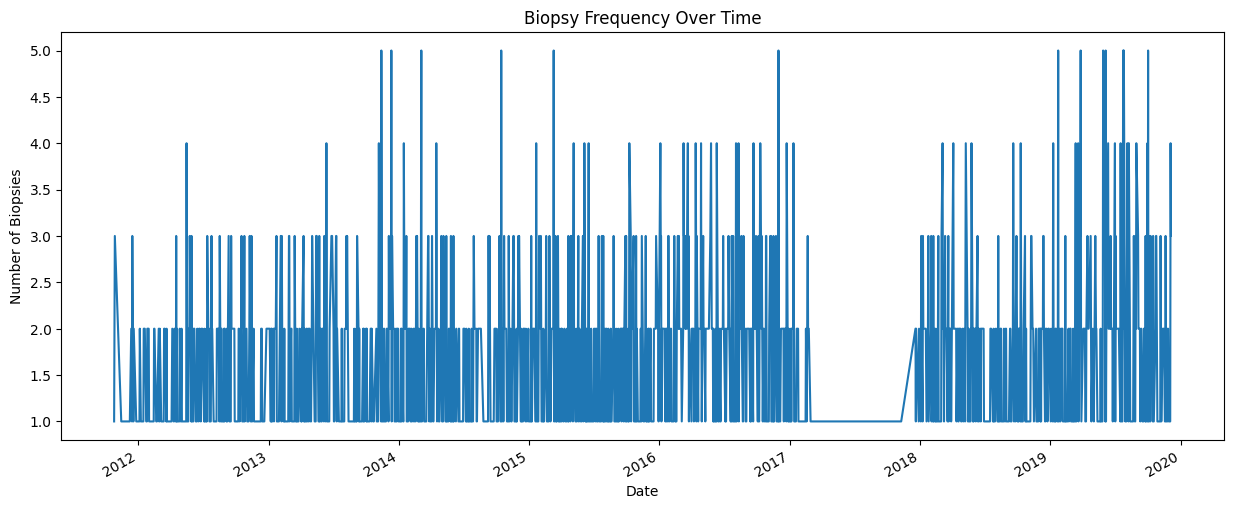

In [13]:
# Calculate days since transplant
df['days_since_transplant'] = (df['date_prelevement'] - df['LT_date']).dt.days
# 1. Temporal analysis of biopsy frequency
plt.figure(figsize=(15, 6))
df['date_prelevement'].value_counts().sort_index().plot()
plt.title('Biopsy Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Biopsies')
plt.show()

## Distribution of Time Points

This bar chart displays the distribution of biopsies across different time points:

- Time points range from M1 (1 month) to >M12 (more than 12 months post-transplant).
- The most frequent time point is >M12, with nearly 400 biopsies.
- Early time points (M1, M2, M3) each have around 300 biopsies.
- There's a slight decrease in frequency for middle time points (M4, M6).
- M3-M4 has very few biopsies, possibly representing an unusual or transitional time point.

This distribution indicates a strong emphasis on long-term follow-up (>M12), while also maintaining frequent early post-transplant monitoring.


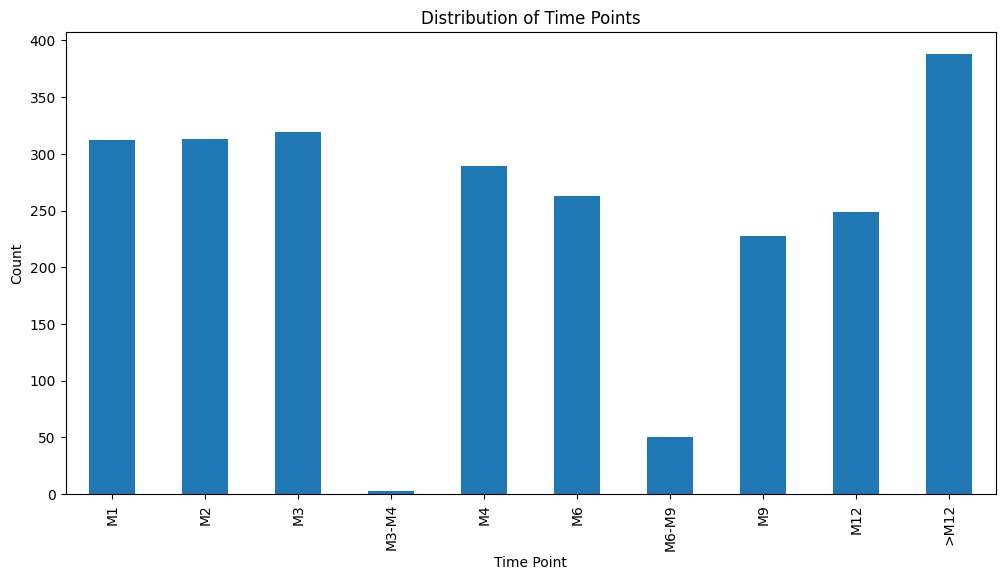

In [14]:
# 2. Analysis of time points
time_point_order = ['M1', 'M2', 'M3', 'M3-M4', 'M4', 'M6', 'M6-M9', 'M9', 'M12', '>M12']
df['time_point'] = pd.Categorical(df['time_point'], categories=time_point_order, ordered=True)
plt.figure(figsize=(12, 6))
df['time_point'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Time Points')
plt.xlabel('Time Point')
plt.ylabel('Count')
plt.show()

## Cluster Distribution by Time Point


This stacked bar chart shows how cluster distribution changes over time:

- Cluster 1 is prevalent across all time points, especially in early months (M1-M3).
- Cluster 2 becomes more common in later time points (M6 onwards).
- Clusters 5 and 6 are more frequent in early time points (M1-M2).
- The '>M12' category shows a more even distribution of clusters, suggesting diverse long-term outcomes.


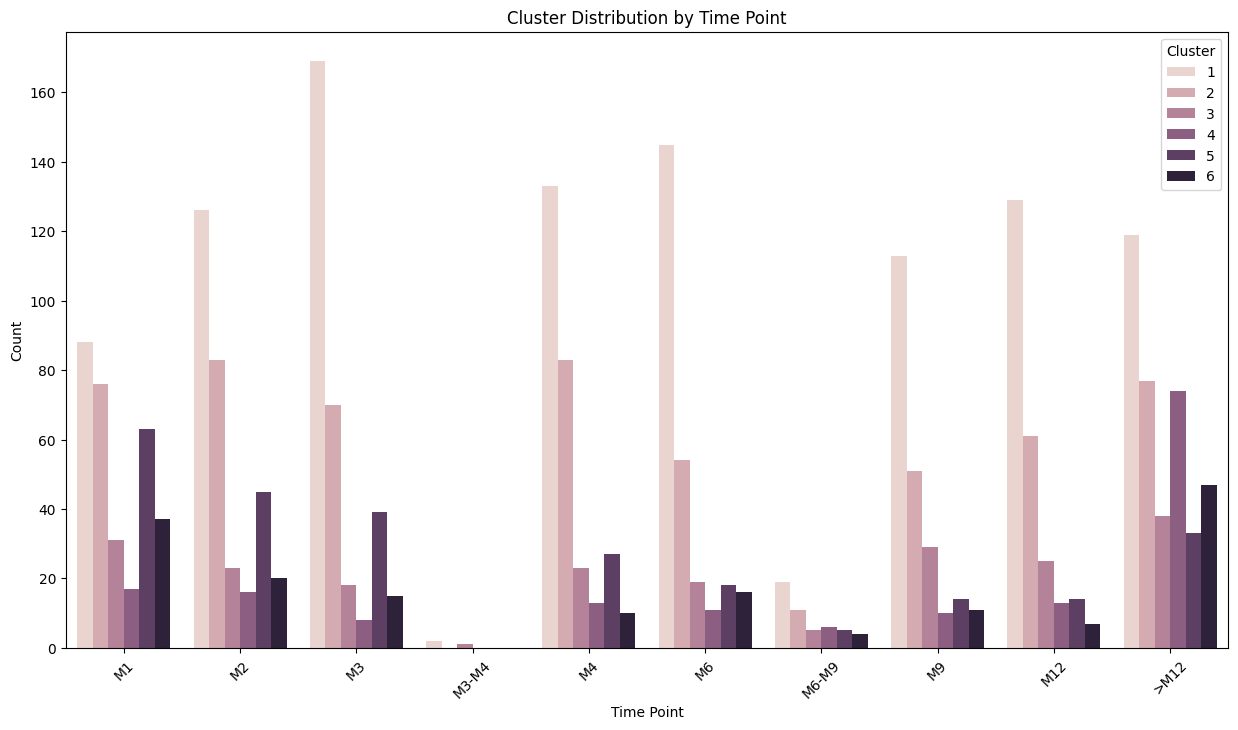

In [15]:
# 3. Cluster analysis by time point
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='time_point', hue='clust')
plt.title('Cluster Distribution by Time Point')
plt.xlabel('Time Point')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


## Correlation Heatmap of Biopsy Features

This heatmap shows the correlations between different histological features:

- Most correlations are positive but weak to moderate in strength.
- The strongest correlations are:
  - final_hyperplasie_pn and final_fibrin_alv (0.4)
  - final_hyperplasie_pn and final_pn_alv (0.34)
  - final_pn_alv and final_fibrin_alv (0.35)
- final_C4d shows weak correlations with other features, suggesting it might represent a distinct pathological process.
- final_infiltrat_B_BNSP and final_infiltrat_A_A1_A2 show relatively weak correlations with other features and each other.

The moderate correlations suggest that while some features tend to co-occur, each provides some unique information about the graft state.


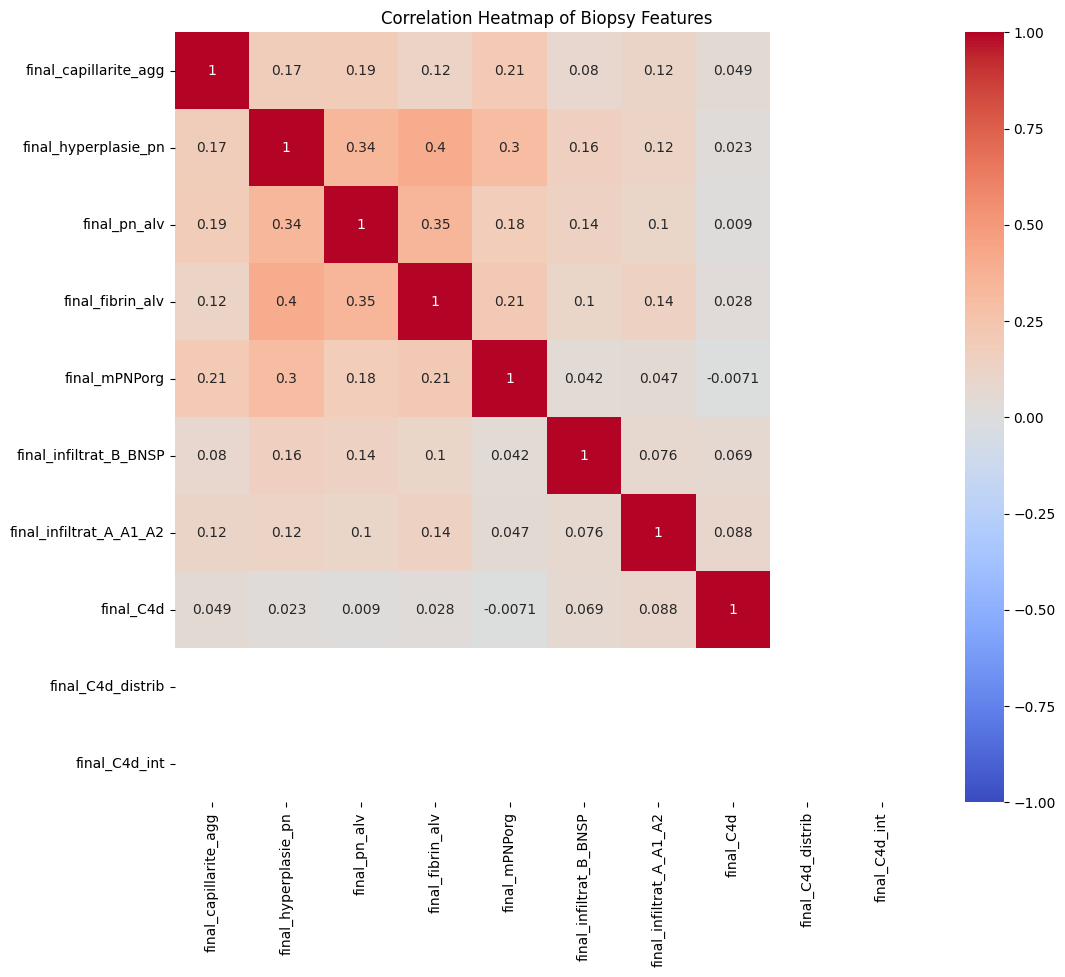

In [16]:
# 4. Feature correlation analysis
feature_cols = ['final_capillarite_agg', 'final_hyperplasie_pn', 'final_pn_alv', 
                'final_fibrin_alv', 'final_mPNPorg', 'final_infiltrat_B_BNSP', 
                'final_infiltrat_A_A1_A2', 'final_C4d', 'final_C4d_distrib', 'final_C4d_int']

# Convert features to numeric
for col in feature_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.extract('(\d+)$', expand=False))

correlation_matrix = df[feature_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Biopsy Features')
plt.show()

## Mean Feature Values by Cluster

This heatmap shows the average value of each feature for each cluster:

- Cluster 1 has low values across all features, possibly representing healthy or minimally affected tissue.
- Cluster 2 is characterized by high capillarite (final_capillarite_agg).
- Cluster 3 shows high infiltrat_A_A1_A2.
- Cluster 4 is distinguished by high infiltrat_B_BNSP.
- Cluster 5 has high mPNPorg.
- Cluster 6 shows elevated values across multiple features, possibly indicating more severe pathology.


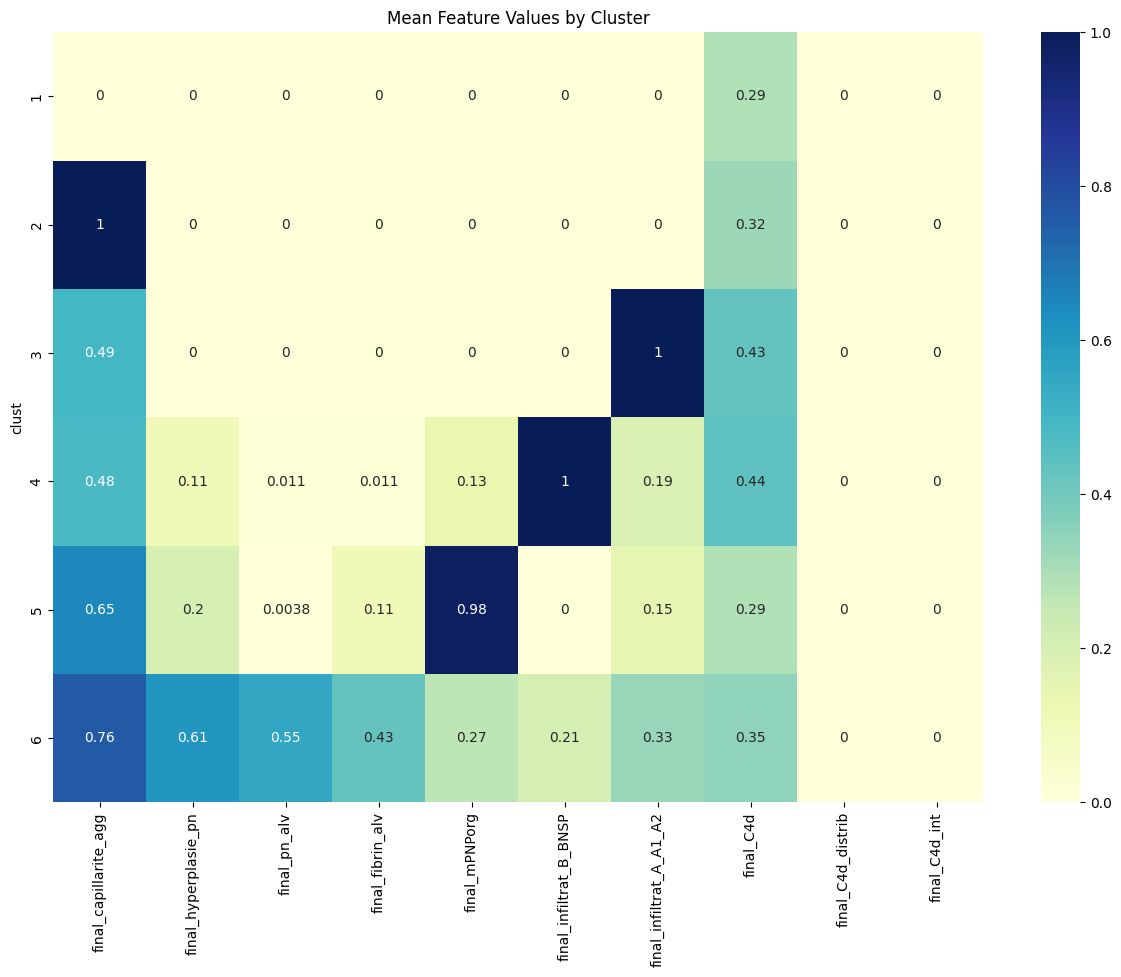

In [17]:
# 5. Cluster characteristics
cluster_means = df.groupby('clust')[feature_cols].mean()
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu')
plt.title('Mean Feature Values by Cluster')
plt.show()


# Analysis of Variance (ANOVA) and Tukey's HSD Test Results for Days Since Transplant Across Clusters

## ANOVA Results

- F-statistic: 15.8136
- p-value: 0.0000 (< 0.05)

The ANOVA results show a statistically significant difference in the mean number of days since transplant across the different clusters (p < 0.05). This indicates that at least one cluster differs significantly from the others in terms of the timing of biopsies post-transplant.

## Tukey's HSD (Honestly Significant Difference) Test Results

The Tukey's HSD test provides pairwise comparisons between clusters to identify which specific clusters differ significantly from each other. Here are the key findings:

1. Cluster 4 shows significant differences with all other clusters:
   - Cluster 4 vs. Cluster 1: Mean difference of 260.4407 days (p < 0.05)
   - Cluster 4 vs. Cluster 2: Mean difference of 266.1995 days (p < 0.05)
   - Cluster 4 vs. Cluster 3: Mean difference of 230.3111 days (p < 0.05)
   - Cluster 4 vs. Cluster 5: Mean difference of -308.6926 days (p < 0.05)
   - Cluster 4 vs. Cluster 6: Mean difference of -205.4882 days (p < 0.05)

2. No other pairwise comparisons show statistically significant differences (all p-values > 0.05).

3. Notable mean differences (though not statistically significant):
   - Cluster 5 vs. Cluster 6: Mean difference of 103.2044 days (p = 0.0795)
   - Cluster 3 vs. Cluster 5: Mean difference of -78.3815 days (p = 0.2579)

## Interpretation

1. Cluster 4 stands out significantly from all other clusters in terms of the timing of biopsies post-transplant. Biopsies in Cluster 4 tend to occur:
   - Much later than those in Clusters 1, 2, and 3 (by about 230-266 days)
   - Much earlier than those in Clusters 5 and 6 (by about 205-309 days)

2. The timing of biopsies in Clusters 1, 2, 3, 5, and 6 do not differ significantly from each other, suggesting similar temporal patterns for these clusters.

3. There's a suggestive difference between Clusters 5 and 6 (about 103 days), but it doesn't reach statistical significance at the 0.05 level.

4. The significant differences associated with Cluster 4 suggest that it may represent a distinct phase in the post-transplant journey, possibly associated with specific clinical characteristics or outcomes.

5. The lack of significant differences among most clusters indicates that many pathological patterns (represented by clusters) can occur across various time points post-transplant, emphasizing the need for continuous monitoring.

These findings highlight the complex relationship between time since transplant and the pathological patterns observed in biopsies. They suggest that while some pathological states (like those in Cluster 4) may be time-dependent, many others can occur across various time points, underscoring the importance of regular, long-term monitoring of lung transplant patients.

In [18]:
# 6. ANOVA test for days since transplant across clusters
f_statistic, p_value = stats.f_oneway(*[group['days_since_transplant'].values 
                                        for name, group in df.groupby('clust')])
print(f"ANOVA test for days since transplant across clusters:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")


ANOVA test for days since transplant across clusters:
F-statistic: 15.8136
p-value: 0.0000


In [19]:
# Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(df['days_since_transplant'], df['clust'])
print("\nTukey's HSD test results:")
print(tukey_results)


Tukey's HSD test results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2   -5.7588 0.9998  -64.3876     52.87  False
     1      3   30.1296 0.9096  -53.6825  113.9417  False
     1      4  260.4407    0.0  168.3695   352.512   True
     1      5  -48.2518 0.4935 -126.5389   30.0352  False
     1      6   54.9526 0.5224  -36.4698  146.3749  False
     2      3   35.8884 0.8638  -53.7441   125.521  False
     2      4  266.1995    0.0  168.8002  363.5989   True
     2      5   -42.493  0.706  -126.982   41.9959  False
     2      6   60.7114 0.4731  -36.0748  157.4976  False
     3      4  230.3111    0.0  115.9705  344.6517   True
     3      5  -78.3815 0.2579 -181.9455   25.1826  False
     3      6    24.823 0.9894  -88.9958  138.6417  False
     4      5 -308.6926    0.0 -419.0473 -198.3379   True
     4      6 -205.4882    0.0 -325.5188  -85

## Histological Features Over Time by Cluster


This set of scatter plots shows the presence (1) or absence (0) of various histological features over time, colored by cluster:

- Most features show a binary pattern (0 or 1) across all time points.
- Certain clusters are associated with specific feature patterns:
  - Cluster 1 (green) often shows absence (0) of most features.
  - Cluster 6 (red) frequently shows presence (1) of multiple features.
- Some features (e.g., final_capillarite_agg, final_hyperplasie_pn) show clear differences between clusters.
- There's no strong time-dependent pattern for most features, suggesting these pathological findings can occur at any time post-transplant.

The C4d-related features (final_C4d_distrib and final_C4d_int) show less clear patterns, possibly due to missing data.


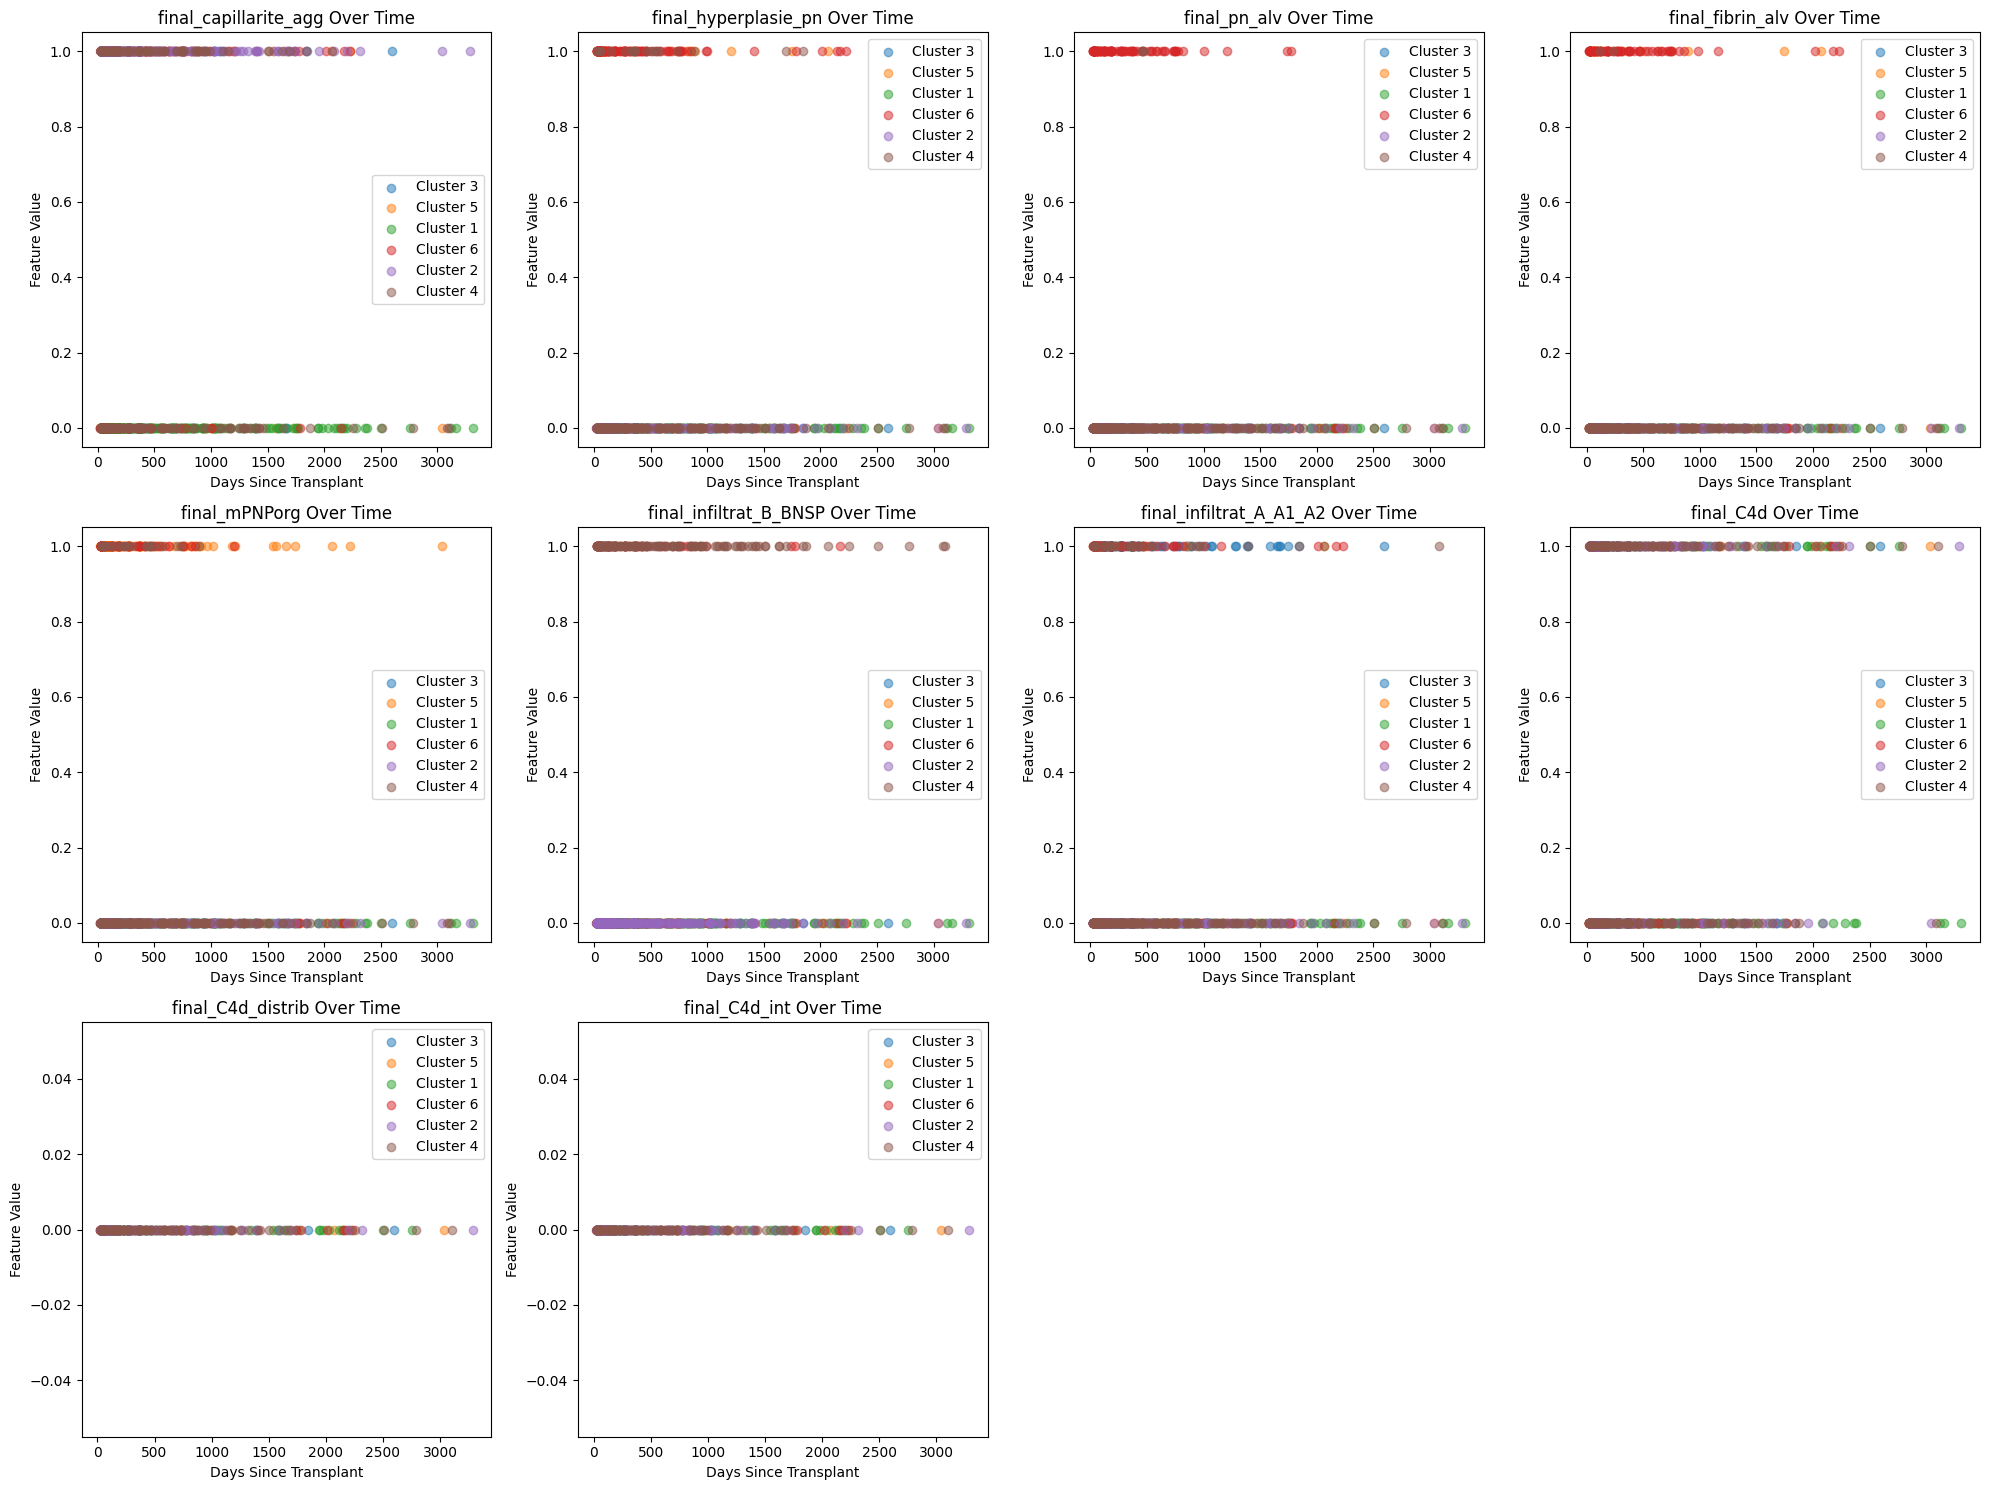

In [20]:
# 7. Longitudinal analysis of key features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_cols, 1):
    plt.subplot(3, 4, i)
    for cluster in df['clust'].unique():
        cluster_data = df[df['clust'] == cluster]
        plt.scatter(cluster_data['days_since_transplant'], cluster_data[feature], alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'{feature} Over Time')
    plt.xlabel('Days Since Transplant')
    plt.ylabel('Feature Value')
    plt.legend()
plt.tight_layout()
plt.show()

## Distribution of Biopsies per Patient

This bar chart shows the number of biopsies performed per patient:

- The majority of patients have between 3 and 7 biopsies.
- There's a peak at 5 biopsies per patient.
- Some patients have a high number of biopsies (up to 13), which might indicate more complex cases or longer follow-up periods.
- Few patients have only 1 or 2 biopsies, suggesting that multiple follow-ups are common practice.

This distribution highlights the longitudinal nature of the study and the variability in patient monitoring needs.


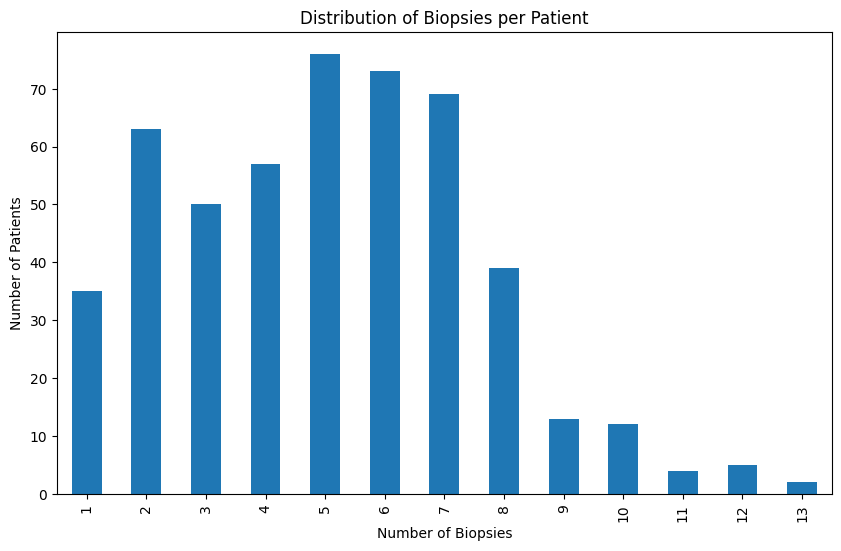

In [21]:
# 8. Patient-level analysis
patient_counts = df.groupby('NEFG2').size()
plt.figure(figsize=(10, 6))
patient_counts.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Biopsies per Patient')
plt.xlabel('Number of Biopsies')
plt.ylabel('Number of Patients')
plt.show()

## Cluster Transitions

This heatmap shows how patients transition between clusters over time:
 
- Many patients remain in their initial cluster (high values along the diagonal).
- Cluster 1 shows the highest stability, with 93 patients remaining in this cluster.
- There are notable transitions from Cluster 5 to Cluster 1 (47 patients) and from Cluster 2 to Cluster 1 (55 patients).
- Transitions to Cluster 6 are relatively rare, possibly indicating it as a more severe or irreversible state.


/var/folders/4l/60lgrf9s6sqbf6lcr70gbl2c0000gn/T/ipykernel_47469/3307015451.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transitions = df.sort_values(['NEFG2', 'date_prelevement']).groupby('NEFG2').apply(get_transition)


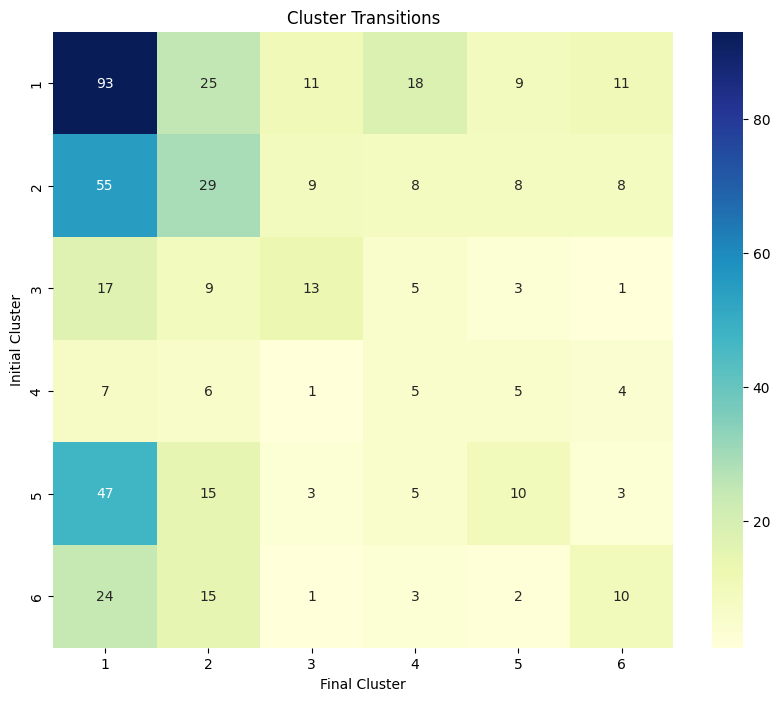

In [22]:
# 9. Transition analysis
def get_transition(group):
    return pd.Series({
        'initial_cluster': group['clust'].iloc[0],
        'final_cluster': group['clust'].iloc[-1],
        'num_biopsies': len(group)
    })

transitions = df.sort_values(['NEFG2', 'date_prelevement']).groupby('NEFG2').apply(get_transition)
transition_matrix = pd.crosstab(transitions['initial_cluster'], transitions['final_cluster'])

plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cluster Transitions')
plt.xlabel('Final Cluster')
plt.ylabel('Initial Cluster')
plt.show()


In [23]:

# 10. Summary statistics
print("\nAdditional Key Findings:")
print(f"1. Total number of unique patients: {df['NEFG2'].nunique()}")
print(f"2. Average number of biopsies per patient: {df['NEFG2'].value_counts().mean():.2f}")
print(f"3. Median time between transplant and first biopsy: {df.groupby('NEFG2')['days_since_transplant'].min().median():.0f} days")
print(f"4. Most common initial cluster: {transitions['initial_cluster'].mode().values[0]}")
print(f"5. Most common final cluster: {transitions['final_cluster'].mode().values[0]}")
print(f"6. Percentage of patients with cluster changes: {(transitions['initial_cluster'] != transitions['final_cluster']).mean()*100:.2f}%")


Additional Key Findings:
1. Total number of unique patients: 498
2. Average number of biopsies per patient: 5.06
3. Median time between transplant and first biopsy: 34 days
4. Most common initial cluster: 1
5. Most common final cluster: 1
6. Percentage of patients with cluster changes: 67.87%
